### Porting to Google Colab
The following cell enables this notebook to run from Google Colab as well as from your local machine IDE.<br>
You can change `root_directory` and/or `this_notebook_google_path` to point to the directory in your Google account, which contains this notebook, together with the `imgs` sub-directory and the rest of the files.<br>

In [1]:
import sys
import os
try:
    from google.colab import drive as google_drive # type: ignore
except:
    # no Google Colab --> fall back to local machine
    google_drive = None

if google_drive is not None:
    google_drive_directory = os.path.join('/','content','gdrive')
    google_drive.mount(google_drive_directory)
    all_projects_path = os.path.join(google_drive_directory, 'Othercomputers','My Laptop', 'projects')
else:
    all_projects_path = os.path.join('d:\\', 'projects')

project_path = os.path.join(all_projects_path,'RUNI','Thesis')
assert os.path.exists(project_path), f'Project path {project_path} not found!'
# enable import python files from this notebook's path
sys.path.append(project_path)
# enable reading images and data files from this notebook's path
os.chdir(project_path)

datasets_path = os.path.join(project_path, 'datasets')
assert os.path.exists(datasets_path), f'Datasets path {datasets_path} not found!'

output_path = os.path.join(project_path, 'output')
os.makedirs(output_path, exist_ok=True)
assert os.path.exists(output_path), f'Output path {output_path} not found!'

print(f'Current working directory: {os.getcwd()}')
print(f'Datasets path: {datasets_path}')
print(f'Output path: {output_path}')

Current working directory: d:\projects\RUNI\Thesis
Datasets path: d:\projects\RUNI\Thesis\datasets
Output path: d:\projects\RUNI\Thesis\output


In [2]:
from python.hpc import HybridArray

Numba version: 0.60.0
numba.njit is available.
CUDA is available and will be used for GPU operations.
Printing CUDA active device attributes:
    Name:                               NVIDIA GeForce GTX 1650
    Free Memory:                        3367680 [KB]
    Total Memory:                       4193984 [KB]
    Compute capability:                 7.5
    Clock rate:                         1560.00 [MHz]
    Memory clock rate:                  4001.00 [MHz]
    Memory bus width:                   128 bits
    Memory band width (theoretical)     128.03 [GByte/Sec]
    Number of multiprocessors:          16
    Minimal grid size:                  128
    Maximum grid size:                  (2147483647, 65535, 65535)
    Maximum block dimensions:           (1024, 1024, 64)
    Maximum threads per block:          1024
    Warp size:                          32
    Maximum shared memory per block:    49152 [bytes]
    Maximum registers per block:        65536
    Total constant memory:   

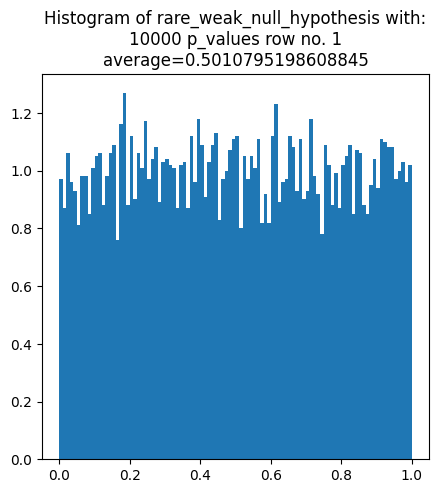

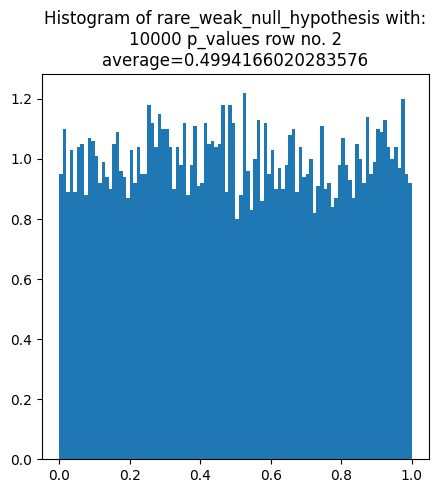

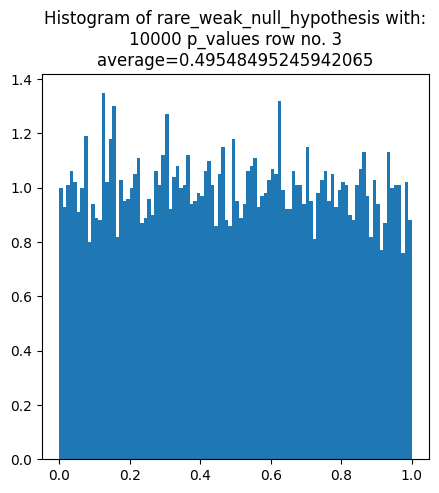

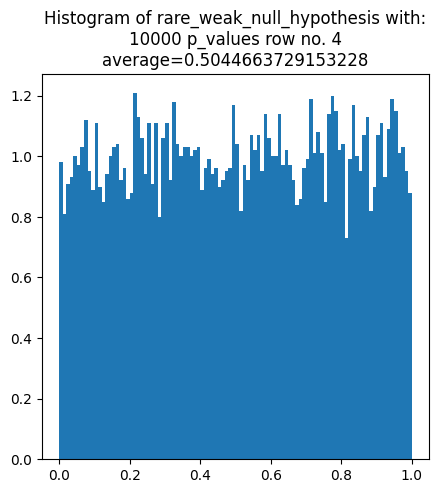

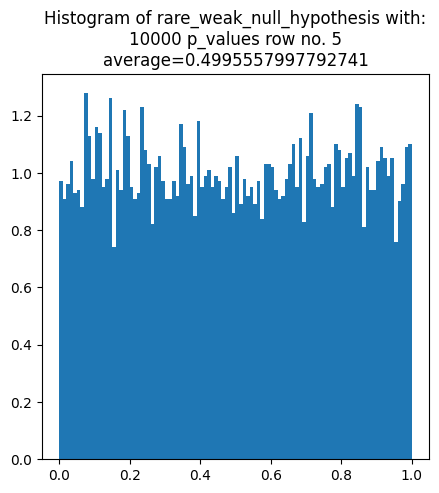

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from python.array_math_utils.array_math_utils import average_column
from python.rare_weak_model.rare_weak_model import rare_weak_null_hypothesis

N = 10000
num_monte = 5
data_gpu = HybridArray().realloc(shape=(num_monte,N), dtype=np.float64, use_gpu=True)
rare_weak_null_hypothesis(sorted_p_values_output=data_gpu, ind_model=0)
avg_column = HybridArray()
average_column(data_gpu, out_column=avg_column)
avg_numpy = avg_column.numpy().reshape(-1)
data_numpy = data_gpu.numpy()
bins = int(np.sqrt(N)+0.5)
for ind_row,x in enumerate(data_numpy):
    plt.figure(figsize=(5, 5))
    plt.hist(x=x, bins=bins, density=True)
    plt.title(f'Histogram of rare_weak_null_hypothesis with:\n{N} p_values row no. {ind_row+1}\naverage={avg_numpy[ind_row]}')
    plt.show()
